How to fix paddleocr installation error:
- `brew install mupdf swig freetype`
- `pip install https://github.com/pymupdf/PyMuPDF/archive/master.tar.gz`

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# Setup path in .env file
import os
from dotenv import load_dotenv
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Get absolut path to project root
load_dotenv()
data_path = os.getenv("PUBTABNET_DATA_DIR")

project_root_dir = os.path.dirname(os.path.abspath("../"))
print("Project root dir:", project_root_dir)
print("")

data_dir = os.getenv("PUBTABNET_DATA_DIR")
absolute_dir = project_root_dir + "/" + data_dir
print("Absolute path:", absolute_dir)

# test, train and val dir
test_dir = absolute_dir + "/test"
train_dir = absolute_dir + "/train"
val_dir = absolute_dir + "/val"
print("Data directories")
print(test_dir)
print(train_dir)
print(val_dir)
print("")

data_cropped_dir = os.getenv("PUBTABNET_CROPPED_DATA_DIR")
absolute_cropped_dir = project_root_dir + "/" + data_cropped_dir
print("Absolute cropped path:", absolute_cropped_dir)

# test, train and val dir for cropped images 
test_cropped_dir = absolute_cropped_dir + "/test"
train_cropped_dir = absolute_cropped_dir + "/train"
val_cropped_dir = absolute_cropped_dir + "/val"
print("Data cropped directories")
print(test_cropped_dir)
print(train_cropped_dir)
print(val_cropped_dir)

def create_directory_if_not_exists(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        # print(f"Directory '{directory_path}' created.")
    # else:
        # print(f"Directory '{directory_path}' already exists.")

Project root dir: /Users/simon/Documents/neural_networks_ocr_project

Absolute path: /Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet
Data directories
/Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet/test
/Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet/train
/Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet/val

Absolute cropped path: /Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet_cropped
Data cropped directories
/Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet_cropped/test
/Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet_cropped/train
/Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet_cropped/val


In [26]:
# Test image
img_name = "PMC515297_004_00"
img_path = f"{test_dir}/{img_name}.png"
print(f"Image path: {img_path}")

# Specify the path to your JSONL file
jsonl_label_file_path = absolute_dir + "/PubTabNet_2.0.0.jsonl"
print(f"Jsonl path: {jsonl_label_file_path}")

Image path: /Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet/test/PMC515297_004_00.png
Jsonl path: /Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet/PubTabNet_2.0.0.jsonl


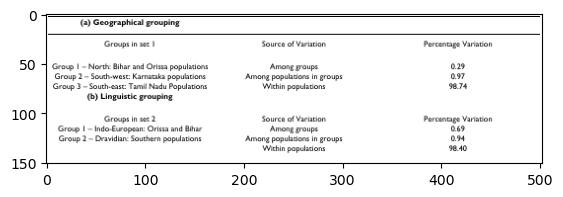

In [27]:
# Load the image and display it
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Read large .jsonl and split it into train, test and val

In [6]:
import jsonlines
import os
import pandas as pd
import time

# Load the JSONL data into a Pandas DataFrame
data = []
with open(jsonl_label_file_path, 'r') as input_reader:
    for item in jsonlines.Reader(input_reader):
        data.append(item)

# Create dataframe based on loaded json data
df = pd.DataFrame(data)
print("Datadrame created")

Datadrame created


In [7]:
df_json = df

In [21]:
data_dirs = [train_dir, test_dir, val_dir]
splits = ["train", "test", "val"]

for temp_data_dir, temp_split in zip(data_dirs, splits):
    print("")
    print("#"*30)
    print(f"Filtering {temp_split} data")
    print("#"*30)
    try:
        # Get a list of image filenames in the image directory
        image_filenames = [filename for filename in os.listdir(temp_data_dir) if filename.endswith(".png")]
        print(f"Found {len(image_filenames)} image files in {temp_data_dir}")

        # Start the timer
        start_time = time.time()

        # Perform filtering using Pandas DataFrame operations
        filtered_df = df_json[(df_json["split"] == temp_split) & (df_json["filename"].isin(image_filenames))].copy()
        filtered_df.set_index('filename', inplace=True)
        print(f"Shape of filtered dataframe: {filtered_df.shape}")

        # Stop the timer
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Filtering took {elapsed_time:.2f} seconds")

        # save the filtered data to a new JSONL file and use sample of filtered data
        output_file = absolute_cropped_dir + "/PubTabNet_2.0.0_" + temp_split + ".json"
        # only print and write data if exists
        if filtered_df.shape[0] != 0:
            print(f"Writing json to: {output_file}")
            filtered_df.sample(n=1000, random_state=42).to_json(output_file, orient="index")
    except: ValueError


##############################
Filtering train data
##############################
Found 500777 image files in /Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet/train
Shape of filtered dataframe: (500777, 3)
Filtering took 0.75 seconds
Writing json to: /Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet_cropped/PubTabNet_2.0.0_train.json

##############################
Filtering test data
##############################
Found 9138 image files in /Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet/test
Shape of filtered dataframe: (0, 3)
Filtering took 0.26 seconds
Writing json to: /Users/simon/Documents/neural_networks_ocr_project/neural_networks_seminar/data/PubTabNet_cropped/PubTabNet_2.0.0_test.json

##############################
Filtering val data
##############################
Found 9115 image files in /Users/simon/Documents/neural_networks_ocr_project/neural_networ

In [44]:
# Change JSON format
import json

data_dirs = [train_dir, test_dir, val_dir]
splits = ["train", "test", "val"]

for temp_data_dir, temp_split in zip(data_dirs, splits):
    try:
        # save the filtered data to a new JSONL file and use sample of filtered data
        input_json = absolute_cropped_dir + "/PubTabNet_2.0.0_" + temp_split + ".json"
        output_json = absolute_cropped_dir + "/PubTabNet_2.0.0_" + temp_split + "_separated.json"

        # Read the original JSON from a file
        with open(input_json, 'r') as file:
            original_json = json.load(file)

        print("")
        print("#"*30)
        print(f"Changing {temp_split} json format")
        print("#"*30)

        # Initialize an empty list to store the transformed data
        transformed_data = []

        # Iterate through the original JSON data
        for filename, info in original_json.items():
            for cell in info['html']['cells']:
                try:
                    data_dict = {
                        "filename": f"{filename.split('.')[0]}_bbox_{cell['bbox'][0]}_{cell['bbox'][1]}_{cell['bbox'][2]}_{cell['bbox'][3]}.png",
                        "split": info['split'],
                        "imgid": info['imgid'],
                        "tokens": cell['tokens'],
                        "bbox": cell['bbox']
                    }
                    transformed_data.append(data_dict)
                except KeyError:
                    pass

        # Write the transformed data to a new file
        with open(output_json, 'w') as file:
            json.dump(transformed_data, file, indent=4)

    except FileNotFoundError:
        print("")
        print(f"{temp_split} json not found")


##############################
Changing train json format
##############################

test json not found

##############################
Changing val json format
##############################


# Crop images based on new train, test and val .json files

In [22]:
from PIL import Image


def crop_image(input_path, output_path, bbox):
    """
    Crop an image based on bounding box coordinates.

    Args:
        input_path (str): Path to the input image (PNG format).
        output_path (str): Path to save the cropped image.
        bbox (list): Bounding box coordinates [x1, y1, x2, y2].

    Returns:
        None
    """
    try:
        # Open the input image
        image = Image.open(input_path)
        
        # Crop the image based on the bounding box coordinates
        cropped_image = image.crop(bbox)
        
        # Save the cropped image
        cropped_image.save(output_path)
    except Exception as e:
        print(f"Error cropping image: {str(e)}")

In [23]:
import json

data_dirs = [train_dir, test_dir, val_dir]
splits = ["train", "test", "val"]

# iterate over train, test and val .json label files
for temp_data_dir, temp_split in zip(data_dirs, splits):
    # Open and read the JSON file
    train_labels = absolute_cropped_dir + "/PubTabNet_2.0.0_" + temp_split + ".json"

    try:
        with open(train_labels, "r") as json_file:
            # save  data
            data = json.load(json_file)

        # iterate over each image
        print(f"Starting to crop {temp_split} images")
        for image_name, value in data.items():
            bboxes = []
            # iterate over each bounding box and append them
            for box_item in value["html"]["cells"]:
                try:
                    bboxes.append(box_item["bbox"])
                except: KeyError

            image_name = image_name.split(".")[0]
            # path of image to crop
            image_path = f"{absolute_dir}/{temp_split}/{image_name}.png"

            for bbox in bboxes:
                image_cropped_path = f"{absolute_cropped_dir}/{temp_split}/{image_name}_bbox_{bbox[0]}_{bbox[1]}_{bbox[2]}_{bbox[3]}.png"
                crop_image(image_path, image_cropped_path, bbox)
        print(f"Finished cropping {temp_split} images")
    except: FileNotFoundError

Starting to crop train images
Finished cropping train images
Starting to crop val images
Finished cropping val images
